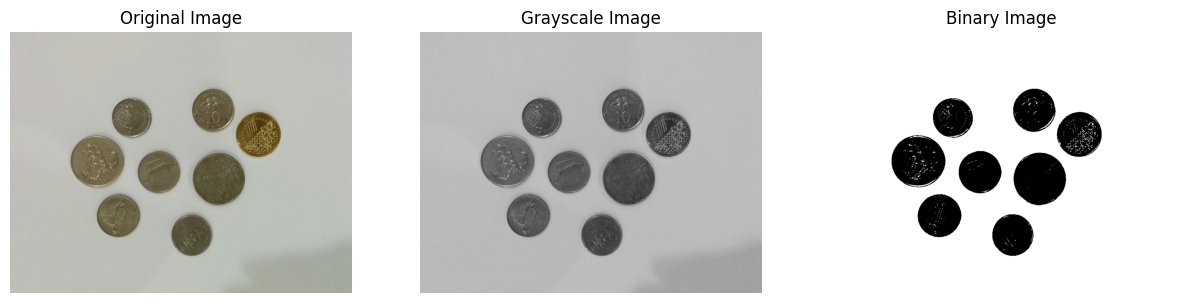

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/Coins.jpeg'
original_image = cv2.imread(image_path)

# Check if the image was loaded successfully
if original_image is None:
    print(f"Error: Could not load image from {image_path}")
else:
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Apply a binary threshold
    # The first argument is the source image (grayscale).
    # The second argument is the threshold value.
    # The third argument is the maximum value to use with the THRESH_BINARY and THRESH_BINARY_INV thresholding types.
    # The fourth argument is the thresholding type.
    _, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    # Display the original, grayscale, and binary images
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Binary Image')
    plt.axis('off')

    plt.show()

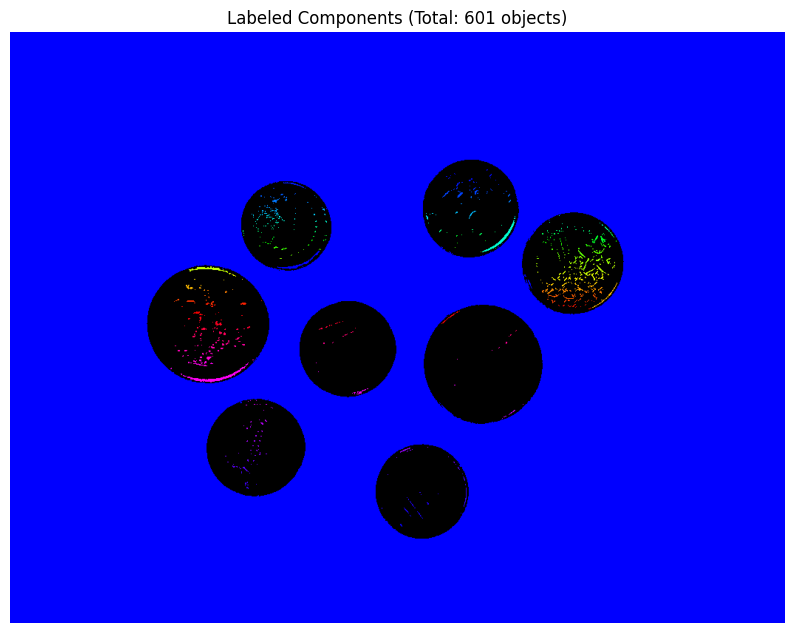

Total number of components found (excluding background): 601


In [ ]:
import numpy as np

# Apply connected component labeling
# The first argument is the binary image.
# The second argument is the connectivity (8-connectivity is common).
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image, 8, cv2.CV_32S)

# Create a colormap for visualizing components
# The first label (background) is usually 0, so we can set its color to black.
# For other labels, assign random colors.
label_hue = np.uint8(179 * labels / np.max(labels))
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

# Convert to BGR for OpenCV display
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# Set background to black
labeled_img[labels == 0] = 0

# Display the labeled image
plt.figure(figsize=(10, 8))
plt.imshow(labeled_img)
plt.title(f'Labeled Components (Total: {num_labels - 1} objects)') # Subtract 1 for background
plt.axis('off')
plt.show()

print(f"Total number of components found (excluding background): {num_labels - 1}")